# Hook callbacks

This provides both a standalone class and a callback for registering and automatically deregistering [PyTorch hooks](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks), along with some pre-defined hooks. Hooks can be attached to any [`nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), for either the forward or the backward pass.

We'll start by looking at the pre-defined hook [`ActivationStats`](/callbacks.hooks.html#ActivationStats), then we'll see how to create our own.

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.callbacks.hooks import * 
from fastai import *
from fastai.train import *
from fastai.vision import *

In [ ]:
show_doc(ActivationStats)

<h2 id="ActivationStats"><code>class</code> <code>ActivationStats</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L70" class="source_link">[source]</a></h2>

> <code>ActivationStats</code>(`learn`:[`Learner`](/basic_train.html#Learner), `modules`:`Sequence`\[[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)\]=`None`, `do_remove`:`bool`=`True`) :: [`HookCallback`](/callbacks.hooks.html#HookCallback)

Callback that record the activations.  

[`ActivationStats`](/callbacks.hooks.html#ActivationStats) saves the layer activations in `self.stats` for all `modules` passed to it. By default it will save activations for *all* modules. For instance:

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
learn = create_cnn(data, models.resnet18, callback_fns=ActivationStats)
learn.fit(1)

Total time: 00:13
epoch  train loss  valid loss
0      0.077055    0.049985    (00:13)



The saved `stats` is a `FloatTensor` of shape `(2,num_modules,num_batches)`. The first axis is `(mean,stdev)`.

In [ ]:
len(learn.data.train_dl),len(learn.activation_stats.modules)

(194, 44)

In [ ]:
learn.activation_stats.stats.shape

torch.Size([2, 44, 194])

So this shows the standard deviation (`axis0==1`) of 5th last layer (`axis1==-5`) for each batch (`axis2`):

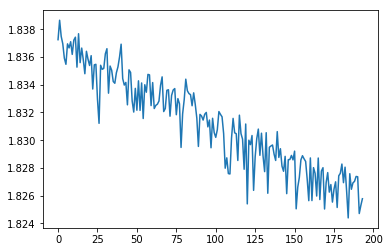

In [ ]:
plt.plot(learn.activation_stats.stats[1][-5].numpy());

In [ ]:
show_doc(Hook)

<h2 id="Hook"><code>class</code> <code>Hook</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L10" class="source_link">[source]</a></h2>

> <code>Hook</code>(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `hook_func`:`HookFunc`, `is_forward`:`bool`=`True`, `detach`:`bool`=`True`)

Create a hook.  

Registers and manually deregisters a [PyTorch hook](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks). Your `hook_func` will be called automatically when forward/backward (depending on `is_forward`) for your module `m` is run, and the result of that function is placed in `self.stored`.

In [ ]:
show_doc(Hook.remove)

<h4 id="Hook.remove"><code>remove</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L24" class="source_link">[source]</a></h4>

> <code>remove</code>()

Deregister the hook, if not called already.

In [ ]:
show_doc(Hooks)

<h2 id="Hooks"><code>class</code> <code>Hooks</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L32" class="source_link">[source]</a></h2>

> <code>Hooks</code>(`ms`:`ModuleList`, `hook_func`:`HookFunc`, `is_forward`:`bool`=`True`, `detach`:`bool`=`True`)

Create several hooks.  

Acts as a `Collection` (i.e. `len(hooks)` and `hooks[i]`) and an `Iterator` (i.e. `for hook in hooks`) of a group of hooks, one for each module in `ms`, with the ability to remove all as a group. Use `stored` to get all hook results. `hook_func` and `is_forward` behavior is the same as [`Hook`](/callbacks.hooks.html#Hook). See the source code for [`HookCallback`](/callbacks.hooks.html#HookCallback) for a simple example.

In [ ]:
show_doc(Hooks.remove)

<h4 id="Hooks.remove"><code>remove</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L43" class="source_link">[source]</a></h4>

> <code>remove</code>()

Deregister all hooks created by this class, if not previously called.

## Convenience functions for hooks

In [ ]:
show_doc(hook_output)

<h4 id="hook_output"><code>hook_output</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L49" class="source_link">[source]</a></h4>

> <code>hook_output</code>(`module`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `detach`:`bool`=`True`) → [`Hook`](/callbacks.hooks.html#Hook)

Function that creates a [`Hook`](/callbacks.hooks.html#Hook) for `module` that simply stores the output of the layer.

In [ ]:
show_doc(hook_outputs)

<h4 id="hook_outputs"><code>hook_outputs</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L50" class="source_link">[source]</a></h4>

> <code>hook_outputs</code>(`modules`:`ModuleList`, `detach`:`bool`=`True`) → [`Hooks`](/callbacks.hooks.html#Hooks)

Function that creates a [`Hook`](/callbacks.hooks.html#Hook) for all passed `modules` that simply stores the output of the layers. For example, the (slightly simplified) source code of [`model_sizes`](/callbacks.hooks.html#model_sizes) is:

```python
def model_sizes(m, size):
    x = m(torch.zeros(1, in_channels(m), *size))
    return [o.stored.shape for o in hook_outputs(m)]
```

In [ ]:
show_doc(model_sizes)

<h4 id="model_sizes"><code>model_sizes</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L86" class="source_link">[source]</a></h4>

> <code>model_sizes</code>(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `size`:`tuple`=`(64, 64)`) → `Tuple`\[`Sizes`, `Tensor`, [`Hooks`](/callbacks.hooks.html#Hooks)\]

Pass a dummy input through the model `m` to get the various sizes of activations.  

In [ ]:
show_doc(num_features_model)

<h4 id="num_features_model"><code>num_features_model</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L92" class="source_link">[source]</a></h4>

> <code>num_features_model</code>(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)) → `int`

Return the number of output features for `model`.  

It can be useful to get the size of each layer of a model (e.g. for printing a summary, or for generating cross-connections for a [`DynamicUnet`](/vision.models.unet.html#DynamicUnet)), however they depend on the size of the input. This function calculates the layer sizes by passing in a minimal tensor of `size`.

In [ ]:
show_doc(HookCallback)

<h2 id="HookCallback"><code>class</code> <code>HookCallback</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L52" class="source_link">[source]</a></h2>

> <code>HookCallback</code>(`learn`:[`Learner`](/basic_train.html#Learner), `modules`:`Sequence`\[[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)\]=`None`, `do_remove`:`bool`=`True`) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

Callback that registers given hooks.  

For all `modules`, uses a callback to automatically register a method `self.hook` (that you must define in an inherited class) as a hook. This method must have the signature:

```python
def hook(self, m:Model, input:Tensors, output:Tensors)
```

If `do_remove` then the hook is automatically deregistered at the end of training. See [`ActivationStats`](/callbacks.hooks.html#ActivationStats) for a simple example of inheriting from this class.

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [ ]:
show_doc(HookCallback.remove)

<h4 id="HookCallback.remove"><code>remove</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L67" class="source_link">[source]</a></h4>

> <code>remove</code>()

In [ ]:
show_doc(HookCallback.on_train_begin)

<h4 id="HookCallback.on_train_begin"><code>on_train_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L58" class="source_link">[source]</a></h4>

> <code>on_train_begin</code>(`kwargs`)

To initialize constants in the callback.  

In [ ]:
show_doc(HookCallback.on_train_end)

<h4 id="HookCallback.on_train_end"><code>on_train_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L64" class="source_link">[source]</a></h4>

> <code>on_train_end</code>(`kwargs`)

Useful for cleaning up things and saving files/models.  

In [ ]:
show_doc(ActivationStats.hook)

<h4 id="ActivationStats.hook"><code>hook</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L76" class="source_link">[source]</a></h4>

> <code>hook</code>(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `i`:`Tensors`, `o`:`Tensors`) → `Tuple`\[`Rank0Tensor`, `Rank0Tensor`\]

In [ ]:
show_doc(ActivationStats.on_batch_end)

<h4 id="ActivationStats.on_batch_end"><code>on_batch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L78" class="source_link">[source]</a></h4>

> <code>on_batch_end</code>(`train`, `kwargs`)

Called at the end of the batch.  

In [ ]:
show_doc(ActivationStats.on_train_begin)

<h4 id="ActivationStats.on_train_begin"><code>on_train_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L72" class="source_link">[source]</a></h4>

> <code>on_train_begin</code>(`kwargs`)

To initialize constants in the callback.  

In [ ]:
show_doc(ActivationStats.on_train_end)

<h4 id="ActivationStats.on_train_end"><code>on_train_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L80" class="source_link">[source]</a></h4>

> <code>on_train_end</code>(`kwargs`)

Useful for cleaning up things and saving files/models.  

## New Methods - Please document or move to the undocumented section

In [ ]:
show_doc(Hook.hook_fn)

<h4 id="Hook.hook_fn"><code>hook_fn</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L18" class="source_link">[source]</a></h4>

> <code>hook_fn</code>(`module`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `input`:`Tensors`, `output`:`Tensors`)